In [1]:
import pandas as pd
from lightgbm import LGBMRegressor

In [2]:
desired_ids = [0, 1, 17, 20, 35, 41, 51, 67, 88] 

In [3]:
train_data = pd.read_csv('../dataset/train.csv')

In [128]:
"""
Since there are only date and id columns in the test data, I don't think it is necessary to take other columns as input to predict the target.
"""

"\nSince there are only date and id columns in the test data, I don't think it is necessary to take other columns as input to predict the target.\n"

In [4]:
train_data = train_data[['id', 'date', 'target']]
train_data['date'] = pd.to_datetime(train_data['date'], format='%Y%m%d%H') 


train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['day'] = train_data['date'].dt.day
train_data['hour'] = train_data['date'].dt.hour

In [10]:
train_data.iloc[50:100]

,id,date,target,year,month,day,hour
50,50,2019-01-01,0.053,2019,1,1,0
51,51,2019-01-01,4.171,2019,1,1,0
52,52,2019-01-01,2.799,2019,1,1,0
53,53,2019-01-01,0.499,2019,1,1,0
54,54,2019-01-01,0.301,2019,1,1,0
55,55,2019-01-01,0.081,2019,1,1,0
56,56,2019-01-01,0.612,2019,1,1,0
57,57,2019-01-01,2.370,2019,1,1,0
58,58,2019-01-01,0.107,2019,1,1,0
59,59,2019-01-01,1.085,2019,1,1,0


In [7]:
split_date = pd.to_datetime('2019-12-21')
val = train_data[train_data['date'] >= split_date]
train = train_data[train_data['date'] < split_date]

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240502 entries, 0 to 4240501
Data columns (total 7 columns):
 #   Column  Dtype         
---  ------  -----         
 0   id      int64         
 1   date    datetime64[ns]
 2   target  float64       
 3   year    int64         
 4   month   int64         
 5   day     int64         
 6   hour    int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 258.8 MB


In [9]:
val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71856 entries, 4240502 to 4312357
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      71856 non-null  int64         
 1   date    71856 non-null  datetime64[ns]
 2   target  71856 non-null  float64       
 3   year    71856 non-null  int64         
 4   month   71856 non-null  int64         
 5   day     71856 non-null  int64         
 6   hour    71856 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 4.4 MB


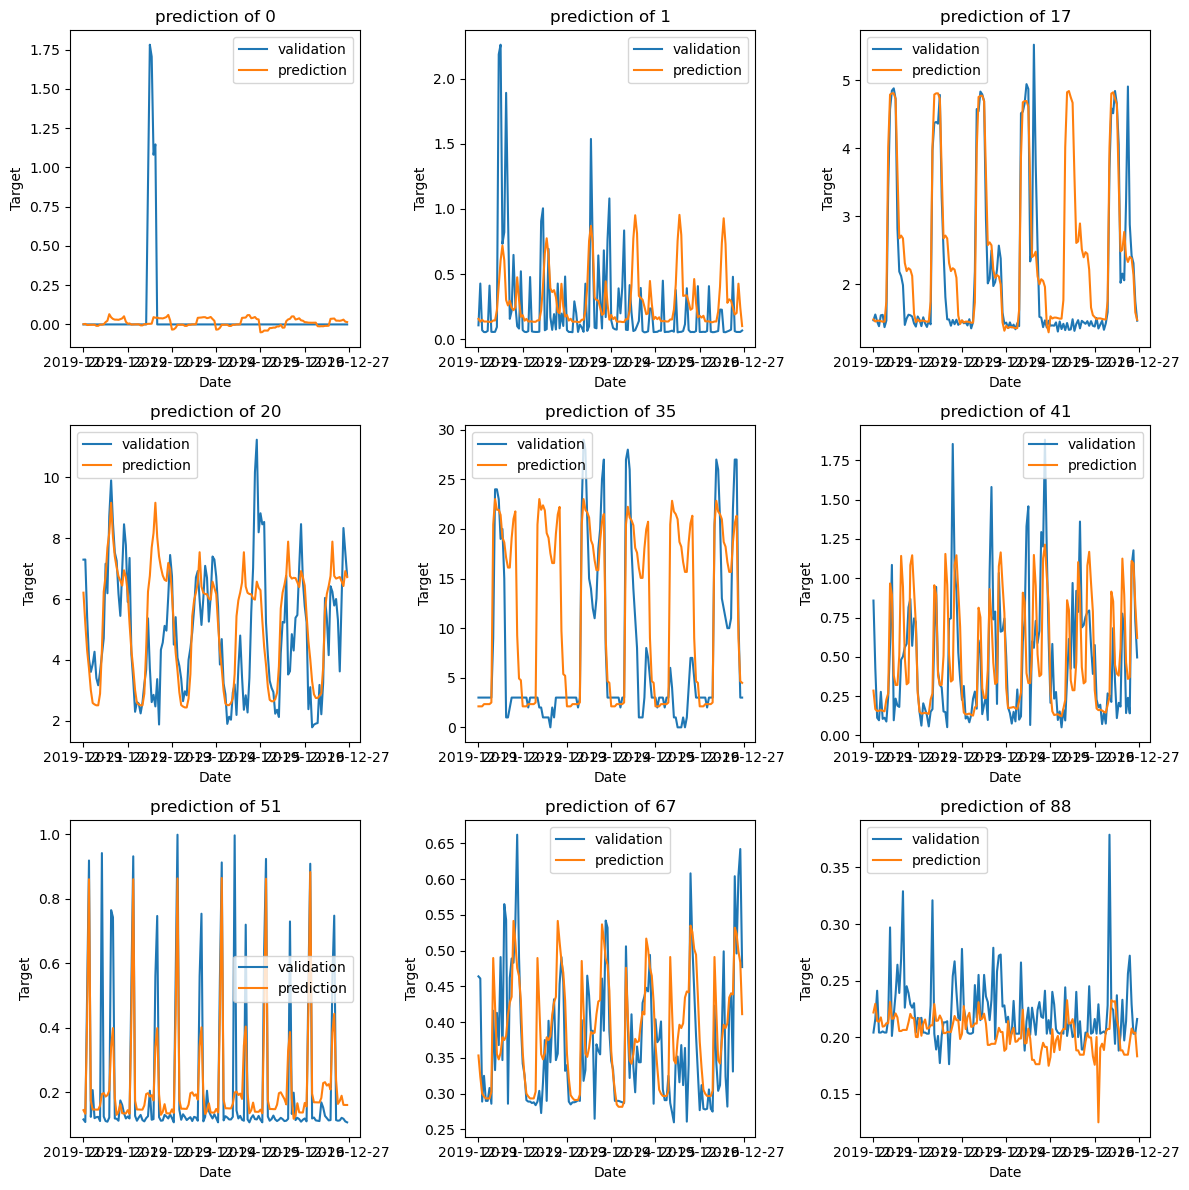

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

desired_ids = [0, 1, 17, 20, 35, 41, 51, 67, 88] 

results = dict()


for i, id in enumerate(desired_ids):
    train_id = train[train['id'] == id]
    train_id_X = train_id[['year', 'month', 'day', 'hour']]
    train_id_Y = train_id['target']


    lgb_regressor = LGBMRegressor()
    lgb_regressor.fit(train_id_X, train_id_Y)

    val_id = val[val['id'] == id]
    val_id_X = val_id[['year', 'month', 'day', 'hour']]
    val_id_Y = val_id['target']

    pred = lgb_regressor.predict(val_id_X)

    row, col = divmod(i, 3)
    axes[row, col].set_title(f'prediction of {id}')
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Target')
    axes[row, col].plot(val_id['date'], val_id_Y)
    axes[row, col].plot(val_id['date'], pred)
    axes[row, col].legend(['validation', 'prediction'])

    results[id] = mean_absolute_error(val_id_Y.values, pred)
    
plt.tight_layout()
plt.show()


In [13]:
for id, mae in results.items():
    print(f'{id}: {mae}')

0: 0.06627500298258364
1: 0.2581021368411777
17: 0.4779376853804267
20: 1.299859867968349
35: 6.265709792899546
41: 0.23158687208554912
51: 0.07938892346563352
67: 0.053136235379079626
88: 0.024617193986336036
